In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

d1 = np.loadtxt('all_int_trans_200.txt')
d2 = np.loadtxt('all_int_trans_460.txt')
d3 = np.loadtxt('all_int_trans_860.txt')
d4 = np.loadtxt('all_int_trans_1400.txt')

time1 = d1[:,0]
time2 = d2[:,0]
time3 = d3[:,0]
time4 = d4[:,0]

jump1 = d1[:,1]
jump2 = d2[:,1]
jump3 = d3[:,1]
jump4 = d4[:,1]

x1 = len(jump1) // 49998
x2 = len(jump2) // 49998
x3 = len(jump3) // 49998
x4 = len(jump4) // 49998

jump1_ind = np.array_split(jump1, x1)
time1_ind = np.array_split(time1, x1)

jump2_ind = np.array_split(jump2, x2)
time2_ind = np.array_split(time2, x2)

jump3_ind = np.array_split(jump3, x3)
time3_ind = np.array_split(time3, x3)

jump4_ind = np.array_split(jump4, x4)
time4_ind = np.array_split(time4, x4)


In [8]:
def int_binning(jump):
    bin1 = []
    bin2 = []
    bin3 = []
    bin4 = []
    bin5 = []
    bin6 = []
    bin7 = []
    bin8 = []
    bin9 = []
    bin10 = []
    for item in jump:
        if item <= 50.0 and item >=20.0:
            bin1.append(item)
        if item > 50.0 and item <= 100.0:
            bin2.append(item)
        if item > 100.0 and item <= 150.0:
            bin3.append(item)
        if item > 150.0 and item <= 200.0:
            bin4.append(item)
        if item > 200.0 and item <= 250.0:
            bin5.append(item)
        if item > 250.0 and item <= 300.0:
            bin6.append(item)
        if item > 300.0 and item <= 350.0:
            bin7.append(item)
        if item > 350.0 and item <= 400.0:
            bin8.append(item)
        if item > 400.0 and item <= 450.0:
            bin9.append(item)
        if item > 450.0:
            bin10.append(item)
    return len(bin1), len(bin2), len(bin3), len(bin4), len(bin5), len(bin6), len(bin7), len(bin8), len(bin9), len(bin10)

jump1_bin = int_binning(jump1)
jump2_bin = int_binning(jump2)
jump3_bin = int_binning(jump3)
jump4_bin = int_binning(jump4)

In [9]:
print(jump1_bin)
print(jump2_bin)
print(jump3_bin)
print(jump4_bin)

def find_average(bin, x):
    av_list = []
    for item in bin:
        a = item/x
        av_list.append(a)
    return av_list
av_bin1 = find_average(jump1_bin, x1)
av_bin2 = find_average(jump2_bin, x2)
av_bin3 = find_average(jump3_bin, x3)
av_bin4 = find_average(jump4_bin, x4)

print(av_bin1)
print(av_bin2)
print(av_bin3)
print(av_bin4)

(1244, 1258, 367, 25, 0, 0, 0, 0, 0, 0)
(1827, 1141, 705, 357, 91, 34, 2, 0, 0, 0)
(1180, 994, 371, 451, 240, 173, 114, 10, 32, 15)
(745, 441, 126, 148, 107, 50, 63, 9, 0, 0)
[155.5, 157.25, 45.875, 3.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[182.7, 114.1, 70.5, 35.7, 9.1, 3.4, 0.2, 0.0, 0.0, 0.0]
[118.0, 99.4, 37.1, 45.1, 24.0, 17.3, 11.4, 1.0, 3.2, 1.5]
[124.16666666666667, 73.5, 21.0, 24.666666666666668, 17.833333333333332, 8.333333333333334, 10.5, 1.5, 0.0, 0.0]


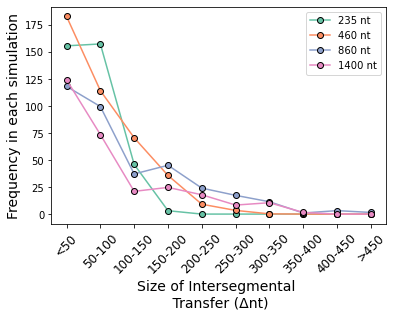

In [14]:
import matplotlib.pyplot as plt

cmap = sns.color_palette("Set2")
bins = np.array([25, 75, 125, 175, 225, 275, 325, 375, 425, 475])
count1 = np.array(av_bin1)
count2 = np.array(av_bin2)
count3 = np.array(av_bin3)
count4 = np.array(av_bin4)

#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

plt.plot(bins, count1, 'o-', label= '235 nt', color=cmap[0], markeredgecolor='black')
plt.plot(bins, count2, 'o-', label = '460 nt', color=cmap[1], markeredgecolor='black')
plt.plot(bins, count3, 'o-', label = '860 nt', color=cmap[2], markeredgecolor='black')
plt.plot(bins, count4, 'o-', label = '1400 nt', color=cmap[3], markeredgecolor='black')

xtick_pos = [25, 75, 125, 175, 225, 275, 325, 375, 425, 475]
xtick_labels = ['<50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '>450']
plt.xticks(xtick_pos, xtick_labels, rotation = 45, fontsize=12)
plt.legend()
plt.xlabel('Size of Intersegmental \n Transfer (Δnt)', fontsize=14)
plt.ylabel('Frequency in each simulation', fontsize=14)

def rate_calculation(count):
    sim_time = 50000000*3.267*(10**(-8))
    rate = []
    for item in count:
        if item!=0:
           rate1 = sim_time/item
           rate.append(rate1)
        else:
           rate2 = 0.0
           rate.append(rate2)
    return rate

rate1 = rate_calculation(count1)
rate2 = rate_calculation(count2)
rate3 = rate_calculation(count3)
rate4 = rate_calculation(count4)


plt.savefig('Frequency_plot_diff_len.png', dpi=300, bbox_inches='tight')

In [21]:
sim_time = 50000000*3.267*(10**(-8))
print(sim_time)

1.6335


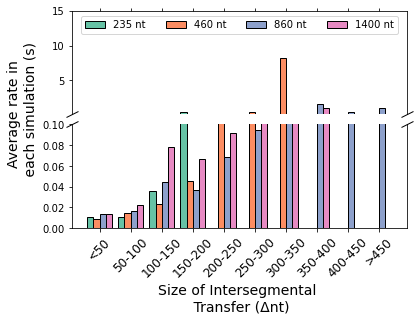

In [19]:
f, (ax, ax2) = plt.subplots(2,1, sharex=True)

bins = np.array([25, 75, 125, 175, 225, 275, 325, 375, 425, 475])

ax.bar(bins-15, rate1, width= 10, label= '235 nt', color=cmap[0], edgecolor='black')
ax.bar(bins-5, rate2, width= 10, label = '460 nt', color=cmap[1], edgecolor='black')
ax.bar(bins+5, rate3, width= 10, label = '860 nt', color=cmap[2], edgecolor='black')
ax.bar(bins+15, rate4, width= 10, label = '1400 nt', color=cmap[3], edgecolor='black')

ax2.bar(bins-15, rate1, width= 10, label= '235 nt', color=cmap[0], edgecolor='black')
ax2.bar(bins-5, rate2, width= 10, label = '460 nt', color=cmap[1], edgecolor='black')
ax2.bar(bins+5, rate3, width= 10, label = '860 nt', color=cmap[2], edgecolor='black')
ax2.bar(bins+15, rate4, width= 10, label = '1400 nt', color=cmap[3], edgecolor='black')


xtick_pos = [25, 75, 125, 175, 225, 275, 325, 375, 425, 475]
xtick_labels = ['<50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '>450']
ax2.set_ylim(0,0.1)
ax.set_ylim(0.2, 15)

f.subplots_adjust(hspace=0.1)
d= 0.5
ax.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
#ax.xtick_params(labeltop=False, rotation=45)

kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax.plot([0, 1], [0, 0], transform=ax.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
ax.legend(loc='upper center', ncol=5, fontsize= 10)


ax2.set_xticks(xtick_pos, xtick_labels, fontsize=12, rotation=45)
ax2.set_xlabel('Size of Intersegmental \n Transfer (Δnt)', fontsize=14)
#ax2.set_ylabel('Average rate in \n each simulation (s)', fontsize=13)
f.text(0.01, 0.3, 'Average rate in \n each simulation (s)', ha='center', rotation=90, fontsize=14)

f.savefig('rate_plot_diff_len.png', dpi=300, bbox_inches='tight')